For our Project 2 we found the dataset "Default of Credit Card Clients" through kaggle. We wanted to see how well three different predictive models could determine whether or not an individual would default on their credit card payments.

In [4]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


file_path = "UCI_Credit_Card.csv"
credit_data = pd.read_csv(file_path)

ModuleNotFoundError: No module named 'matplotlib'

The libraries that we used include those such as pandas, which is a powerful tool in Python that can handle structured data. Matplotlib was imported for plotting, aided by seaborn's statistical data visualization interface. XGBoost allowed for optimized, efficient, and accurate machine learning tasks like those in our predictive models.

Before we got into the construction and testing of our models, we wanted to delve deeper into our dataset and conduct a thorough examination of variables. This could help identify any inconsistencies, ambiguous data values, and potential challenges we would face interpreting our data. We aimed to enhance the quality of our analysis and ensure as much reliability and validity to our statistical approach. 

In [ ]:
# Distribution of Variables: Sex, Education, Marriage
sex_distribution = credit_data['SEX'].value_counts()
print("Sex Distribution:")
print(sex_distribution)

education_distribution = credit_data['EDUCATION'].value_counts()
print("\nEducation Distribution:")
print(education_distribution)

marriage_distribution = credit_data['MARRIAGE'].value_counts()
print("\nMarriage Distribution:")
print(marriage_distribution)

Sex Distribution:
SEX
2    18112
1    11888
Name: count, dtype: int64

Education Distribution:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

Marriage Distribution:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


We wanted to start with the distribution of some categorical variables used in our dataset. Those would be Sex, Education, and Marital Status (Marriage). Sex is distinguished by a 1 for male and a 2 for female. Education is split into 5 categories (number range 1-6). A 1 signifies that the individual has obtained a graduate school education, a 2 for university, a 3 for high school, a 4 for 'others', and both 5 and 6 are described as 'unknown'. The values for 4-6 on the Education category are something to take note of for interpreting the data. And finally, Marital Status is denoted by a 1 for married, 2 for single, and 3 for others (separated, divorced, etc). 

Our Sex distribution showed a predominant female population in the dataset, identifying a possible relationship between gender dynamics within credit card usage and payment behavior. 

Our Education distribution allowed us to assess that socioeconomic background was not skewed too unfavorly into the dataset, especially when compared to real-world experience. Most of the sample population held a university-level education.

Our Marriage distribution was similar to Education in interpretation, with single individual's marking the highest population in our dataset, followed by those that were married. Much of our datasets sample population is consistent with what you could come to expect in real life.

In [ ]:
# Average Credit Limits by Defaulters and Non-Defaulters
average_credit_limit_defaulters = credit_data.loc[credit_data['default.payment.next.month'] == 1, 'LIMIT_BAL'].mean()
average_credit_limit_defaulters_formatted = "{:.2f}".format(average_credit_limit_defaulters)
print("Average Credit Limit for Defaulters:", average_credit_limit_defaulters_formatted)

average_credit_limit_non_defaulters = credit_data.loc[credit_data['default.payment.next.month'] == 0, 'LIMIT_BAL'].mean()
average_credit_limit_non_defaulters_formatted = "{:.2f}".format(average_credit_limit_non_defaulters)
print("Average Credit Limit for Non-Defaulters:", average_credit_limit_non_defaulters_formatted)

Average Credit Limit for Defaulters: 130109.66
Average Credit Limit for Non-Defaulters: 178099.73


A simple, yet informative statistic that we wanted to view next was the average credit limit imposed onto payment defaulters and non-defaulters. The results are consistent with our expectations, with non-defaulters having a larger average credit limit than individuals defaulting on their credit card payments.

In [ ]:
# Default Rate by Education Level
default_rate_by_education = credit_data.groupby('EDUCATION')['default.payment.next.month'].mean()
print("\nDefault Rate by Education Level:")
print(default_rate_by_education)


Default Rate by Education Level:
EDUCATION
0    0.000000
1    0.192348
2    0.237349
3    0.251576
4    0.056911
5    0.064286
6    0.156863
Name: default.payment.next.month, dtype: float64


The next thing we wanted to do was look at the default rate of each education level. Interestingly, the rate between graduate, university, and high school education is not significantly different. We wanted to view these results more clearly, so we created a barplot to better visualize these statistics.

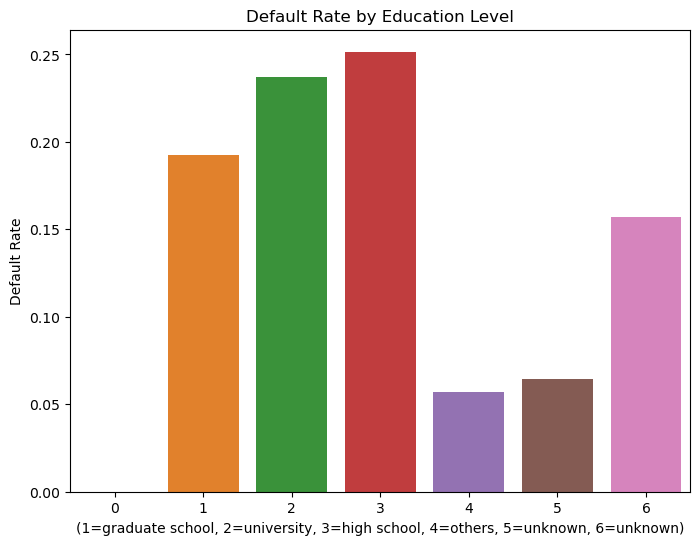

In [ ]:
# Barplot for Default Rate by Education Level 
plt.figure(figsize=(8, 6))
sns.barplot(x=default_rate_by_education.index, y=default_rate_by_education.values)
plt.title('Default Rate by Education Level')
plt.xlabel('(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)')
plt.ylabel('Default Rate')
plt.show()

As you can see there is a clear, marginal increase in default rate the less education you have between graduate school and high school. Still, it's important to note the unknown education variables that could reflect unsound statistical interpretation of the overall meaning behind education and your likelihood to default on your credit card payments. 

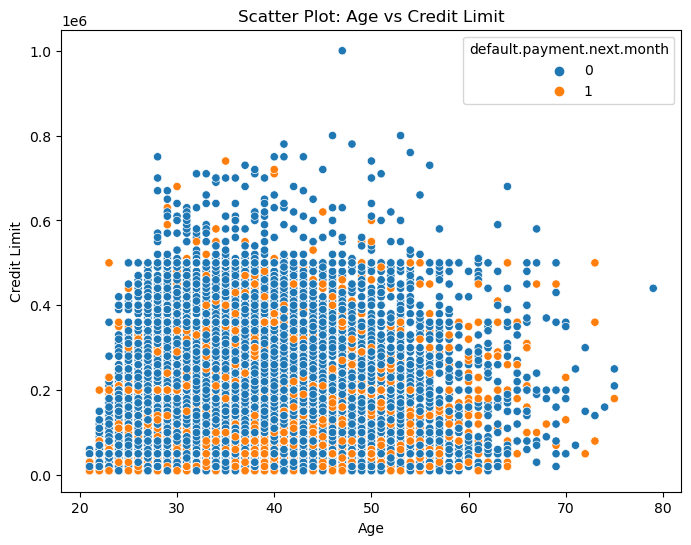

In [ ]:
# Scatterplot for Age by Credit Limit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=credit_data, x='AGE', y='LIMIT_BAL', hue='default.payment.next.month')
plt.title('Scatter Plot: Age vs Credit Limit')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.show()

Wanting to bring the Age category into our analysis, we created a scatterplot for Age versus Credit Limit. There are a few interesting details we can extrapolate here, like that most of the dataset population who are defaulting on their credit card payments seem to be between the ages of about 30-50. It also seems that those with a lower credit limit are already defaulting more on their payments. This could be an important statistical factor for many things, like creditors determining credit worthiness or risk profiles.

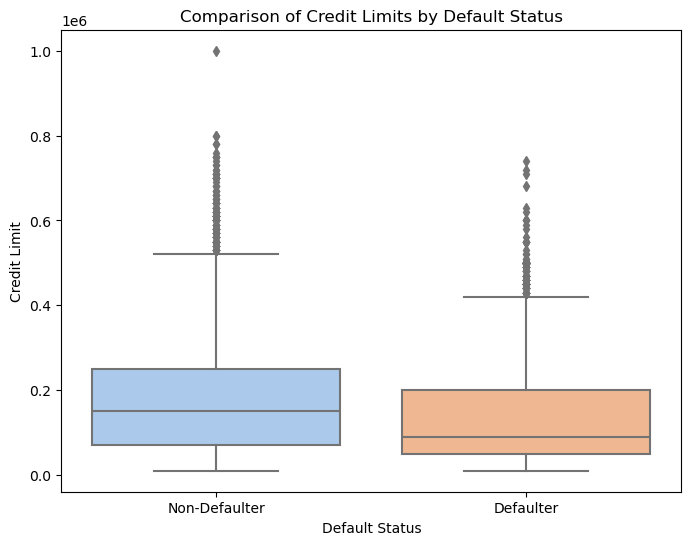

In [ ]:
# Boxplot for Credit Limits by Default Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=credit_data, palette='pastel')
plt.title('Comparison of Credit Limits by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Credit Limit')
plt.xticks(ticks=[0, 1], labels=['Non-Defaulter', 'Defaulter'])
plt.show()

Next, we wanted to analyze credit limits by default status with a boxplot, separating defaulters and non-defaulters once again. Our results show that non-defaulters appear to have a higher median credit limit, and an overall higher limit throughout that portion of the dataset population. Defaulters seemingly have quite a low median credit limit of about 100,000. Still, the statistical ceiling of credit limit appears to be quite significant, with outliers ranging near 800,000 for both default statuses and reaching as high as 1,000,000 for non-defaulters.

Default payment status can be vital for creditors in determining credit behavior and tailoring their policies to your risk profile.

For my model I chose to work with a XGBoost Classifier. Which has identical operations to GBM algorithim. The way XGBoost works is that it creates decision tree that are produced in sequential order. Each tree that is creatged as the classifier moves through the data set is trying to fix the erros made by the previous trees. So this model is making decision trees for all the entries in the data set and adjusting the new ones made while keeping track of the results of the previous trees.

In [ ]:
data = pd.get_dummies(
    credit_data, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# Independent features
X = data.drop(['ID', 'default.payment.next.month'], axis=1)
# Dependent feature
y = data['default.payment.next.month']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1,
                              max_depth=6, objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgb_model.predict(X_test)

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 82.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



The results of the confusion matrix are that the overall accuracy is 82.10%. The precision scores of 0.84 and 0.66 where the 0.84 is the percentage of correctly predicted credit payments made, and 0.66 is the percentage of correctly predicted payments that were not made. These scores show that we had a higher percentage of correctly identified payments made.

Overall this model did a great job predicting which of the individuals would make payments and which would not. There is room for further optimization in the future with hyper-parameter tuning, but that can be worked on at a later time. I think that the XGBoost model will be a valuable tool for helping credit lenders/card companies see which of their current potential customers are the safest to lend to.

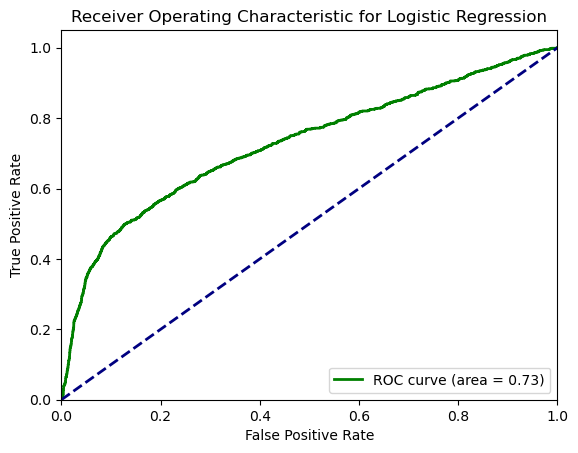

Accuracy of Logistic Regression: 0.8098333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Area under the ROC Curve (AUC-ROC): 0.7269407645167858


In [ ]:
credit_data.drop('ID', axis=1, inplace=True)
X = credit_data.drop('default.payment.next.month', axis=1)
y = credit_data['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

# Predictions
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Accuracy calculation based on logistic regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Classification Report
classification_rep = classification_report(y_test, y_pred_logistic)

# ROC(Receiver Operating Characteristic Curve) and AUC(Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC and calculating ROC value 
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Results
print("Accuracy of Logistic Regression:", accuracy_logistic)
print("Classification Report:")
print(classification_rep)
print("Area under the ROC Curve (AUC-ROC):", roc_auc)

Looking at the plot, we can see that the x axis is represented by False Positive Rates, whereas the y axis is represented by the True Positive Rates. Looking at the graph, the model reveals that the true positive rate shows how well it identifies the true positives in proportion to the false positive rates. The ROC curve illustrates the tradeoff between the x and y axis, in this case, False Positive Rates by True Positive Rates at various threshold points. At these certain points, as the x or y axis changes, the TPR and FPR values also begin to change, ultimately leading to different points on the ROC curve.

In addition to simply plotting the model based on the given data set, I also wanted to plot a model for the area under the curve. This value is a summary measure of the ROC’s curve preference and represents the model’s ability to distinguish positive and negative cases. As we can see, our AUC value was 0.726, rounded to 0.73. The ROC curve value, in our case 0.73, is an indicator of how the overall performance of a binary classification model is in distinguishing positive and negative classes. A ROC curve ranges between 0 and 1, and a score closer to 1 indicates better performance, and in our case of 0.73, it shows that the model performed reasonably well in distinguishing positive and negative cases and has a good chance of getting a higher score if there was more precision in the dataset that we had to work with. 

The accuracy test that I ran on the model simply shows us how accurate the model is based on the data set and predictions it made based on the data set. At a value of 0.82 and 0.69, we can see that the accuracy test helped show that there is a higher accuracy score for positive cases whereas negative cases are not as high but still are above the half 0.50 mark. A higher accuracy score indicates better overall performance of the model and illustrates that the predictions made for those variables are more accurate. If we look at the overall accuracy of the logistical regression, we see that our accuracy score was 0.81, which is still relatively high which means that the predictions made by this model are pretty accurate based on the imported data.

Moving on from the model, I ran a few tests on the Logistical Regression model to help reveal more about the model’s performance, specifically related to this variable. Firstly, I tested the model for a F1-Score, in which our case got a score of 0.89 and 0.35. The F1-score is a score that more so calculates precision between the two sides, in this case being related to default cases(positive) which is marked by 1, and non-default cases(negative) which is marked by 0. As we can see, our score of 0.89 for our positive cases shows that there are higher precision calculations and balanced performance in those sets of cases, ultimately allowing us to see that the precision on those cases are higher. 

Overall, this model did a good job at representing the positive and negative cases, and visualizing the true and false cases, in this case, the x and y axis. The tests that were ran helped demonstrate the accuracy and performance quality of this model in relation to the other variables and can help us conclude that while there is room for further optimization, the Logistic Regression model presents a valuable representation for credit card risk, ultimately offering good advice that can help individuals in decision-making and other financial related topics.

In [ ]:

credit_data = pd.get_dummies(credit_data, columns=["SEX", "EDUCATION", "MARRIAGE"], drop_first=True)
X = credit_data.drop("default.payment.next.month", axis=1)
y = credit_data["default.payment.next.month"]
model = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy') 
cv_precision = cross_val_score(model, X, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X, y, cv=kf, scoring='f1')
cv_auc = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Cross-validation precision scores:", cv_precision)
print("Mean CV Precision:", cv_precision.mean())
print("Cross-validation recall scores:", cv_recall)
print("Mean CV Recall:", cv_recall.mean())
print("Cross-validation F1 scores:", cv_f1)
print("Mean CV F1 Score:", cv_f1.mean())
print("Cross-validation AUC scores:", cv_auc)
print("Mean CV AUC Score:", cv_auc.mean())


Cross-validation scores: [0.8145     0.81433333 0.82666667 0.81066667 0.81133333]
Mean CV Score: 0.8154999999999999
Cross-validation precision scores: [0.64226519 0.64203822 0.6860119  0.67690254 0.63212435]
Mean CV Precision: 0.6558684407479614
Cross-validation recall scores: [0.35872049 0.37669173 0.36477987 0.35611511 0.37265214]
Mean CV Recall: 0.365791868026271
Cross-validation F1 scores: [0.46395292 0.47420729 0.47311828 0.4624823  0.4660655 ]
Mean CV F1 Score: 0.46796525696434693
Cross-validation AUC scores: [0.76247146 0.77569722 0.76838015 0.76905429 0.76087809]
Mean CV AUC Score: 0.7672962425334803


These results are the outcome of cross-validation performed on a machine learning model, likely a Random Forest Classifier, using different evaluation metrics. Let's break down what each of these metrics means:

Cross-validation scores: These are accuracy scores for each fold of the cross-validation. Accuracy represents the proportion of correctly classified instances out of all instances. The values range between 0 and 1, where 1 indicates perfect accuracy. The mean CV score is the average of these accuracy scores across all folds. In this case, the mean accuracy is approximately 0.8155, which indicates that, on average, around 81.55% of instances are correctly classified by the model.
Cross-validation precision scores: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It focuses on the model's ability to correctly classify positive instances. Precision values range between 0 and 1, where 1 indicates perfect precision. The mean CV precision is approximately 0.6559, suggesting that, on average, around 65.59% of the positive predictions made by the model are correct.
Cross-validation recall scores: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positive observations. It measures the model's ability to capture all positive instances. Recall values range between 0 and 1, where 1 indicates perfect recall. The mean CV recall is approximately 0.3658, indicating that, on average, around 36.58% of the actual positive instances are correctly identified by the model.
Cross-validation F1 scores: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the classes are imbalanced. F1 scores range between 0 and 1, where 1 indicates perfect balance between precision and recall. The mean CV F1 score is approximately 0.4680, indicating an overall balance between precision and recall across all folds.
Cross-validation AUC scores: AUC (Area Under the ROC Curve) measures the area under the receiver operating characteristic (ROC) curve, which plots the true positive rate (recall) against the false positive rate. AUC values range between 0 and 1, where 1 indicates a perfect classifier. The mean CV AUC score is approximately 0.7673, indicating that the model performs reasonably well in distinguishing between positive and negative instances across all folds.
These results provide insights into the performance of the machine learning model across different evaluation metrics, helping to assess its effectiveness in solving the classification problem at hand.